In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_hnsw_dir = "./hnsw_experiment_results.csv"
base_hnsw_df = pd.read_csv(base_hnsw_dir)

display(base_hnsw_df)

,k,number_of_queries,recall,avg_distance,indexing_time,query_time
0,10,100000,0.423565,3.237912,872.253560,271.262773
1,20,100000,0.659336,3.332358,852.528585,277.496226
2,50,100000,0.652167,3.465189,865.914154,280.392188
3,100,100000,0.632823,3.576822,865.369875,278.957058


In [3]:
clusteredhnsw_dir = "./clusterHNSW_experiment_results.csv"
clusteredhnsw_df = pd.read_csv(clusteredhnsw_dir)

# remove n_clusters where n_clusters = 512
clusteredhnsw_df = clusteredhnsw_df[clusteredhnsw_df['n_clusters'] != 512]

display(clusteredhnsw_df)

,k,n_clusters,top_clusters,recall,avg_distance,cluster_time,indexing_time,query_time
0,10,256,1,0.363868,3.297177,24.339334,356.918162,171.311526
1,10,256,2,0.448803,3.226629,24.339334,356.918162,267.609897
2,10,256,4,0.514334,3.185019,24.339334,356.918162,436.668103
3,10,256,10,0.568870,3.157749,24.339334,356.918162,1483.244625
8,20,256,1,0.406440,3.416388,11.389486,299.805051,109.088433
9,20,256,2,0.546194,3.338859,11.389486,299.805051,233.724636
10,20,256,4,0.680514,3.292900,11.389486,299.805051,456.942179
11,20,256,10,0.819230,3.262185,11.389486,299.805051,1203.629375
16,50,256,1,0.365952,3.593531,10.974645,307.237221,192.569199
17,50,256,2,0.502629,3.500213,10.974645,307.237221,507.392075


In [4]:
clustered_best = clusteredhnsw_df.loc[clusteredhnsw_df.groupby('k')['recall'].idxmax()]
display(clustered_best)

,k,n_clusters,top_clusters,recall,avg_distance,cluster_time,indexing_time,query_time
3,10,256,10,0.568870,3.157749,24.339334,356.918162,1483.244625
11,20,256,10,0.819230,3.262185,11.389486,299.805051,1203.629375
19,50,256,10,0.793912,3.407754,10.974645,307.237221,1613.964064


In [6]:
# Step 1: Rename base_hnsw_df recall column to avoid conflict
base_hnsw_df_renamed = base_hnsw_df[['k', 'recall']].rename(columns={'recall': 'recall_baseline'})

# Step 2: Merge on 'k'
merged_df = clusteredhnsw_df.merge(base_hnsw_df_renamed, on='k', how='left')

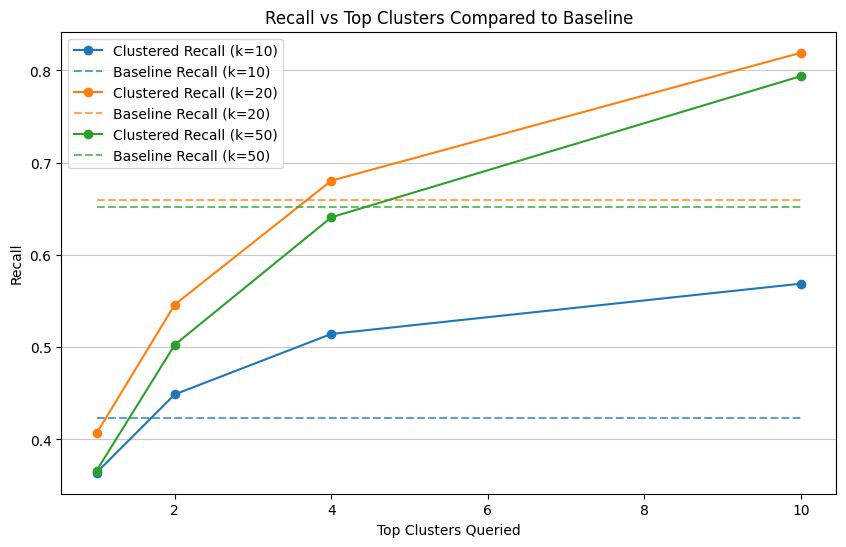

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Use seaborn color palette for better distinction
palette = sns.color_palette("tab10", n_colors=len(merged_df['k'].unique()))

plt.figure(figsize=(10, 6))

for idx, k_val in enumerate(sorted(merged_df['k'].unique())):
    subset = merged_df[merged_df['k'] == k_val]
    color = palette[idx]
    
    # Clustered recall: solid line
    plt.plot(subset['top_clusters'], subset['recall'], marker='o', label=f'Clustered Recall (k={k_val})', color=color)
    
    # Baseline recall: dashed horizontal line in same color, lighter alpha
    baseline = subset['recall_baseline'].iloc[0]
    plt.hlines(baseline, xmin=subset['top_clusters'].min(), xmax=subset['top_clusters'].max(),
               linestyles='dashed', color=color, label=f'Baseline Recall (k={k_val})', alpha=0.7)

plt.xlabel("Top Clusters Queried")
plt.ylabel("Recall")
plt.title("Recall vs Top Clusters Compared to Baseline")
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.7)
# plt.tight_layout()
plt.savefig("recall_vs_top_clusters.png", dpi=600, bbox_inches='tight')
plt.show()


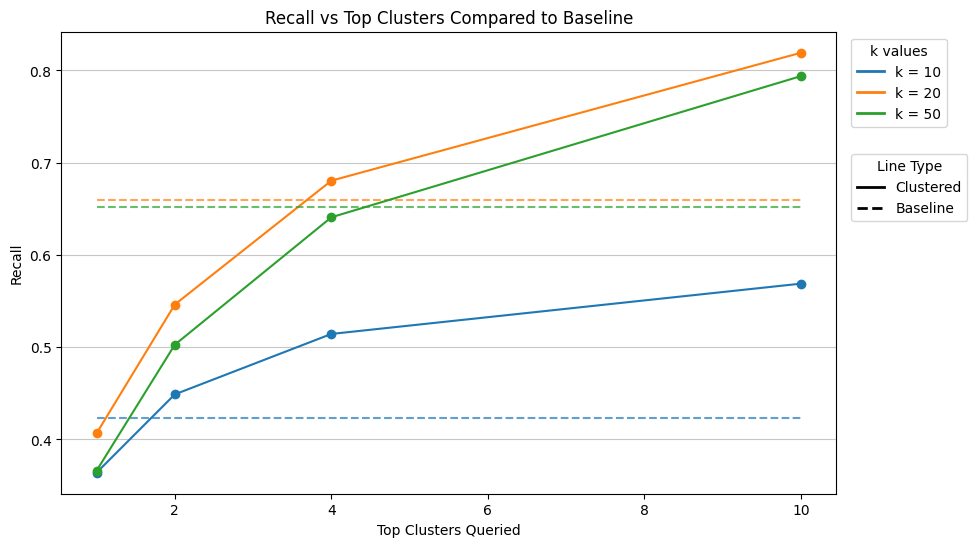

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

palette = sns.color_palette("tab10", n_colors=len(merged_df['k'].unique()))

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Store legend handles for each k and type (clustered/baseline)
k_legend_handles = []
style_legend_handles = []

for idx, k_val in enumerate(sorted(merged_df['k'].unique())):
    subset = merged_df[merged_df['k'] == k_val]
    color = palette[idx]
    
    # Clustered line
    clustered_line, = ax.plot(subset['top_clusters'], subset['recall'], marker='o',
                              label=f'Clustered Recall (k={k_val})', color=color)
    
    # Baseline line
    baseline = subset['recall_baseline'].iloc[0]
    baseline_line = ax.hlines(baseline,
                              xmin=subset['top_clusters'].min(),
                              xmax=subset['top_clusters'].max(),
                              linestyles='dashed', color=color, alpha=0.7)
    
    # Save legend entry per k (using a line for the color only)
    k_legend_handles.append(Line2D([0], [0], color=color, lw=2, label=f'k = {k_val}'))

# Custom handles for line style legend
style_legend_handles.append(Line2D([0], [0], color='black', lw=2, label='Clustered', linestyle='-'))
style_legend_handles.append(Line2D([0], [0], color='black', lw=2, label='Baseline', linestyle='--'))

# Set labels and title
plt.xlabel("Top Clusters Queried")
plt.ylabel("Recall")
plt.title("Recall vs Top Clusters Compared to Baseline")
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Two separate legends:
legend1 = ax.legend(handles=k_legend_handles, title="k values", loc='upper left', bbox_to_anchor=(1.01, 1))
legend2 = ax.legend(handles=style_legend_handles, title="Line Type", loc='upper left', bbox_to_anchor=(1.01, 0.75))
ax.add_artist(legend1)  # Important to keep both legends

plt.savefig("recall_vs_top_clusters.png", dpi=600, bbox_inches='tight')
plt.show()

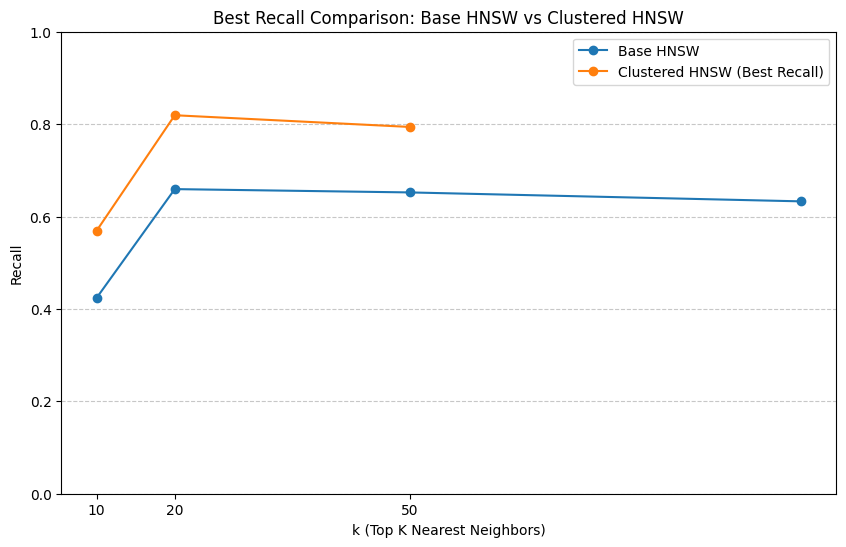

In [ ]:
# Sort both by k for consistency
base_hnsw_df = base_hnsw_df.sort_values('k')
clustered_best = clustered_best.sort_values('k')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(base_hnsw_df['k'], base_hnsw_df['recall'], marker='o', label='Base HNSW')
plt.plot(clustered_best['k'], clustered_best['recall'], marker='o', label='Clustered HNSW (Best Recall)')
plt.xlabel('k (Top K Nearest Neighbors)')
plt.ylabel('Recall')
plt.title('Best Recall Comparison: Base HNSW vs Clustered HNSW')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for recall
plt.xticks(clustered_best['k'])  # Set x-ticks to the unique k values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

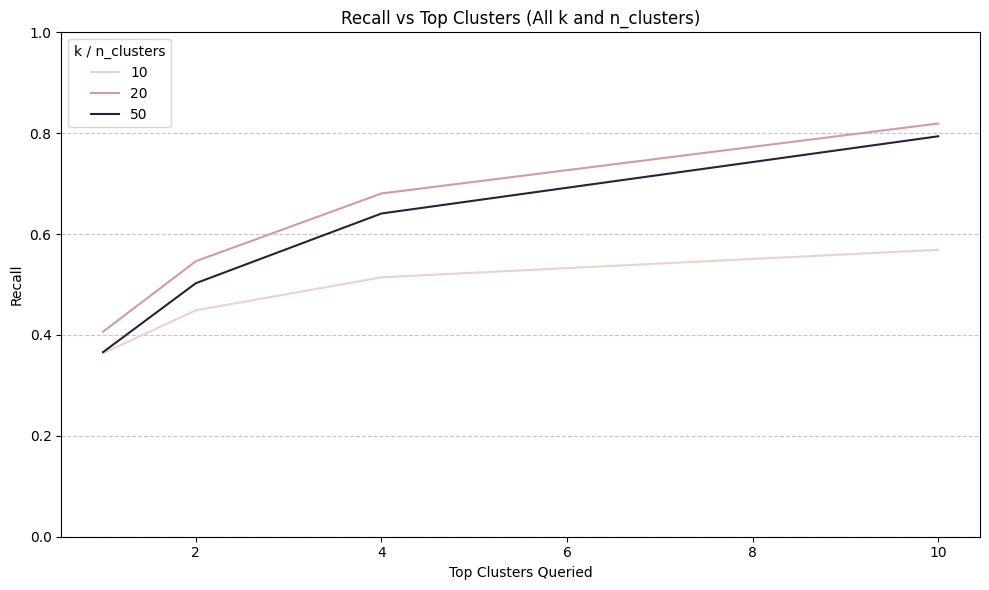

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=clusteredhnsw_df,
    x='top_clusters',
    y='recall',
    hue='k',
    markers=True,
    dashes=False
)
plt.title("Recall vs Top Clusters (All k and n_clusters)")
plt.xlabel("Top Clusters Queried")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='k / n_clusters')
plt.tight_layout()
plt.show()


In [ ]:
# # Merge best clustered HNSW (max recall per k) with base HNSW for indexing/query comparison
# compare_df = pd.merge(
#     base_hnsw_df[['k', 'indexing_time', 'query_time']],
#     clustered_best[['k', 'cluster_time', 'indexing_time', 'query_time']],
#     on='k',
#     suffixes=('_base', '_clustered')
# )

# # Bar plot
# import numpy as np

# x = np.arange(len(compare_df['k']))
# width = 0.35

# plt.figure(figsize=(12, 6))

# # Indexing time
# plt.subplot(1, 2, 1)
# plt.bar(x - width/2, compare_df['indexing_time_base'], width, label='Base HNSW')
# plt.bar(x + width/2, compare_df['indexing_time_clustered'] + compare_df['cluster_time'], width, label='Clustered HNSW')
# plt.xticks(x, compare_df['k'])
# plt.xlabel("k")
# plt.ylabel("Indexing Time (s)")
# plt.title("Indexing Time Comparison")
# plt.legend()
# plt.grid(axis='y', linestyle='-', alpha=0.7)

# # Query time
# plt.subplot(1, 2, 2)
# plt.bar(x - width/2, compare_df['query_time_base'], width, label='Base HNSW')
# plt.bar(x + width/2, compare_df['query_time_clustered'], width, label='Clustered HNSW')
# plt.xticks(x, compare_df['k'])
# plt.xlabel("k")
# plt.ylabel("Query Time (s)")
# plt.title("Query Time Comparison")
# plt.legend()
# plt.grid(axis='y', linestyle='-', alpha=0.7)

# plt.tight_layout()
# plt.show()


In [ ]:
# Least average distance in base HNSW
min_base_distance = base_hnsw_df['avg_distance'].min()
best_base_row = base_hnsw_df.loc[base_hnsw_df['avg_distance'].idxmin()]

# Least average distance in clustered HNSW
min_clustered_distance = clusteredhnsw_df['avg_distance'].min()
best_clustered_row = clusteredhnsw_df.loc[clusteredhnsw_df['avg_distance'].idxmin()]

print("📉 Least Average Distance in Base HNSW:")
print(best_base_row)

print("\n📉 Least Average Distance in Clustered HNSW:")
print(best_clustered_row)

📉 Least Average Distance in Base HNSW:
k                        10.000000
number_of_queries    100000.000000
recall                    0.423565
avg_distance              3.237912
indexing_time           872.253560
query_time              271.262773
Name: 0, dtype: float64

📉 Least Average Distance in Clustered HNSW:
k                  10.000000
n_clusters        256.000000
top_clusters       10.000000
recall              0.568870
avg_distance        3.157749
cluster_time       24.339334
indexing_time     356.918162
query_time       1483.244625
Name: 3, dtype: float64
